In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mne
import matplotlib
from utils import filter_signal, split_array

In [2]:
from scipy import stats

In [3]:
#inline matplotlib plots
%matplotlib inline
# set style to ggplot
plt.style.use('seaborn-darkgrid')

/tmp/ipykernel_20019/1783045785.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [4]:
# weird dependecies
from mne.io import read_raw_eeglab
import warnings; warnings.filterwarnings(action='ignore') # ignore warning for eeglab -----> yup
from scipy.io import loadmat, savemat

In [5]:
def main_loop(i):
    fname_screw = f'../Data/hours/{subject-id}-{session-id}_screew_fixed_{i}-{i+1}'
    EEG_screw = read_raw_eeglab( fname_screw+'.set', preload = False, verbose = False)
    SAMPLING_RATE=500
    eeg_data = EEG_screw.get_data().T
    
    # filter signal
    acc = eeg_data[:,2].reshape(-1,1)
    sd = 10
    cc,idx, mean, std = filter_signal(acc, num_std=sd, padding_before_noise=2*SAMPLING_RATE, padding_after_noise=2*SAMPLING_RATE, max_or_sum=True, abs_or_pow=True)

    # important for visual inspection
    prev = idx[0]
    test = []
    temp = []
    for i in idx:
        if i-prev>1:
            test.append(temp)
            temp = []
        temp.append(i)
        prev = i
    
    mask = np.ones(eeg_data.shape[0], dtype=bool)
    mask[idx] = False
    data = eeg_data[mask,:].T  # 4 channels, m time points

    return (data.shape[1]/eeg_data.shape[0]),cc,idx,mean,std

In [6]:
fname_screw = '../Data/sub-01-BL_screw_fixed'

In [7]:
EEG_screw = read_raw_eeglab( fname_screw+'.set', preload = False, verbose = False)
#sleep_score = pd.read_csv('../Data/ses-02/eeg/sub-01-SR1_screw_eeg_events.tsv',delimiter='\t')

In [8]:
SAMPLING_RATE=500

In [9]:
# load the eeg channels into a numpy array
eeg_data = EEG_screw.get_data().T # i hate the original shape

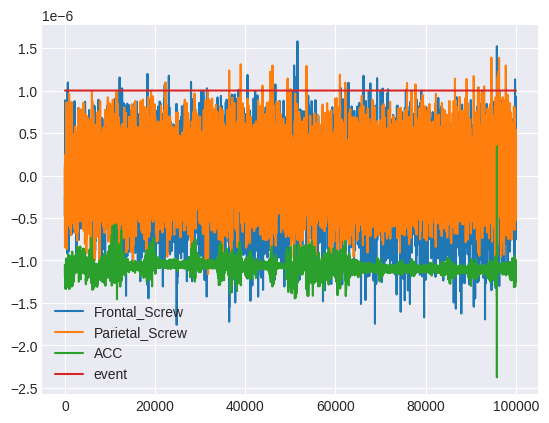

In [10]:
plt.plot(eeg_data[:100000,:])
plt.legend(EEG_screw.ch_names[:])
plt.show()

In [11]:
k2, p = stats.normaltest(eeg_data[:,2])
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [12]:
import numpy as np
import statsmodels.api as sm
import pylab as py
  
# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.
  
# Random data points generated    
  
sm.qqplot(eeg_data[:,2], line ='45')
py.show()

In [ ]:
"len = {:g}".format(eeg_data[:,2].shape[0])

'len = 4.32e+07'

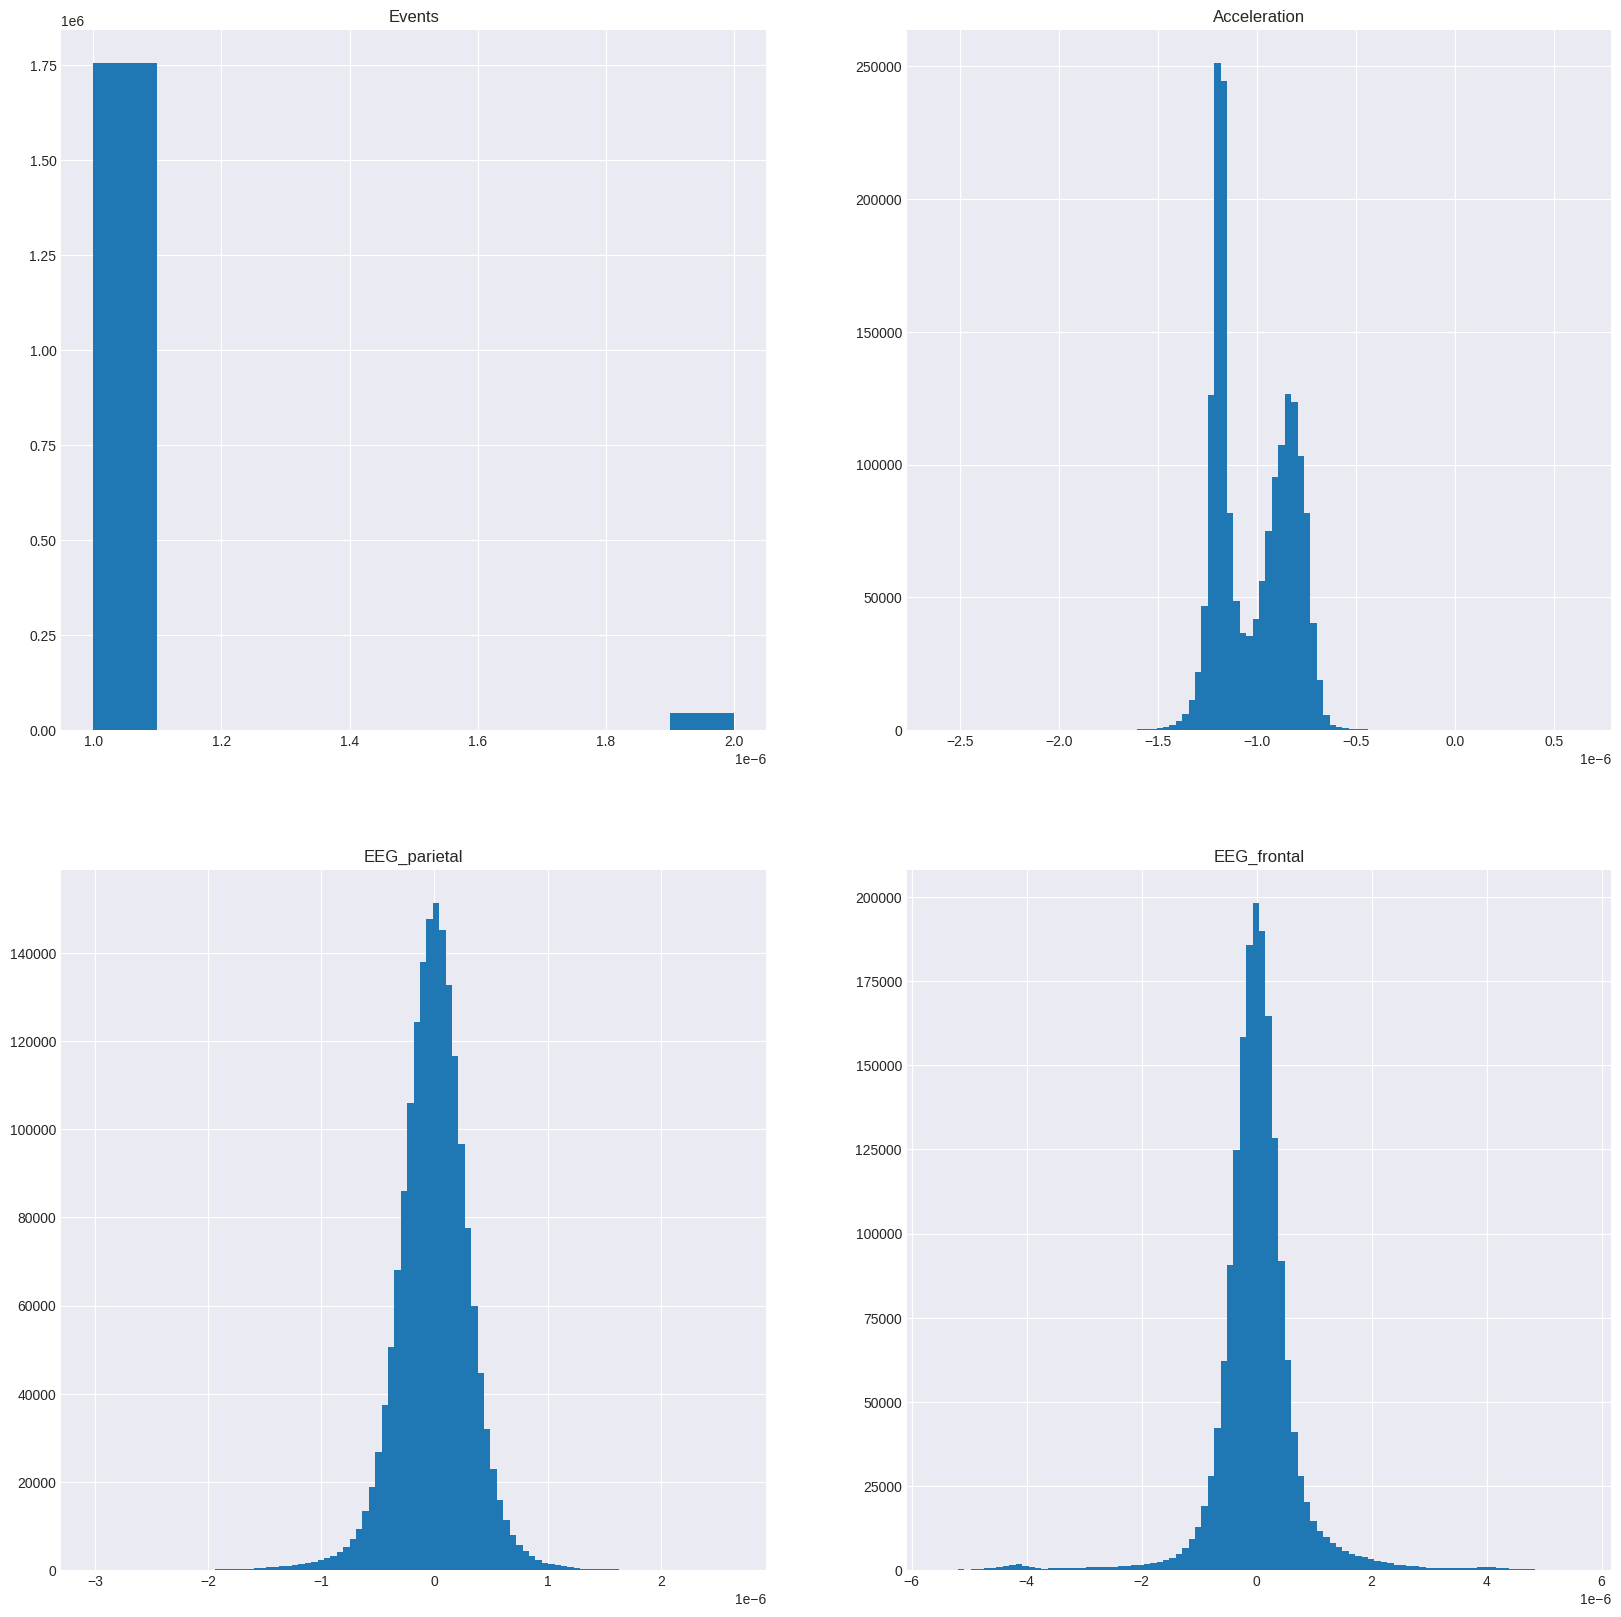

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.title('Events')
plt.hist(eeg_data[:,3])
plt.subplot(2,2,2)
plt.title('Acceleration')
plt.hist(eeg_data[:,2], bins = 100)
plt.subplot(2,2,3)
plt.title('EEG_parietal')
plt.hist(eeg_data[:,1], bins = 100)
plt.subplot(2,2,4)
plt.title('EEG_frontal')
plt.hist(eeg_data[:,0], bins = 100)
plt.show()

In [ ]:
acc = eeg_data[:,2].reshape(-1,1)

In [ ]:
sd = 10

In [ ]:
cc, idx, mean, std = filter_signal(acc, num_std=sd, padding_before_noise=2*500, padding_after_noise=2*500, max_or_sum=True, abs_or_pow=True)

In [ ]:
idx.shape[0]

18402000

KeyboardInterrupt: 

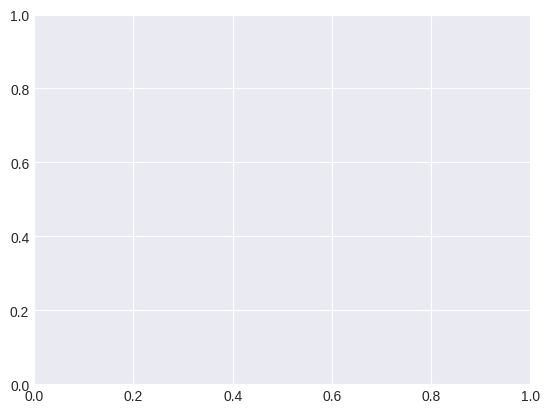

In [ ]:
plt.plot(cc)
plt.axhline(mean+sd*std, color='r')
plt.axhline(mean-sd*std, color='r')

In [ ]:
#matplotlib.use('TkAgg')
# create a NumPy array with simulated EEG data
mask = np.ones(eeg_data.shape[0], dtype=bool)
mask[idx] = False
data = eeg_data[mask,:].T  # 4 channels, m time points
print(data.shape)
print(sum(mask==False))
# create an MNE Info object with channel names and types
info = mne.create_info(['Frontal','Parietal','Acceleration','Event'], sfreq=500, ch_types='eeg')

# create a RawArray object from the NumPy array and MNE Info object
raw = mne.io.RawArray(data, info)

# # plot the EEG data
#raw.plot()
#plt.show()

mne.export.export_raw('../Data/hours/my_data.set',raw,'EEGLAB', overwrite=True)
mne.export.export_raw('../Data/hours/my_data.fdt',raw,'EEGLAB', overwrite=True)
print('Signal to noise ratio: ', data.shape[1]/eeg_data.shape[0])

In [ ]:
read_raw_eeglab( fname_screw+'.set', preload = False, verbose = False)

<RawEEGLAB | sub-01-SR1_screew_fixed_8-9.fdt, 4 x 1800002 (3600.0 s), ~12 kB, data not loaded>

In [ ]:
read_raw_eeglab( '../Data/my_data.set', preload = False, verbose = False)

<RawEEGLAB | my_data.set, 4 x 1718514 (3437.0 s), ~52.5 MB, data loaded>

In [ ]:
# important for visual inspection
idx
prev = idx[0]
test = []
temp = []
for i in idx:
    if i-prev>1:
        test.append(temp)
        temp = []
    temp.append(i)
    prev = i

In [ ]:
len(test)

143

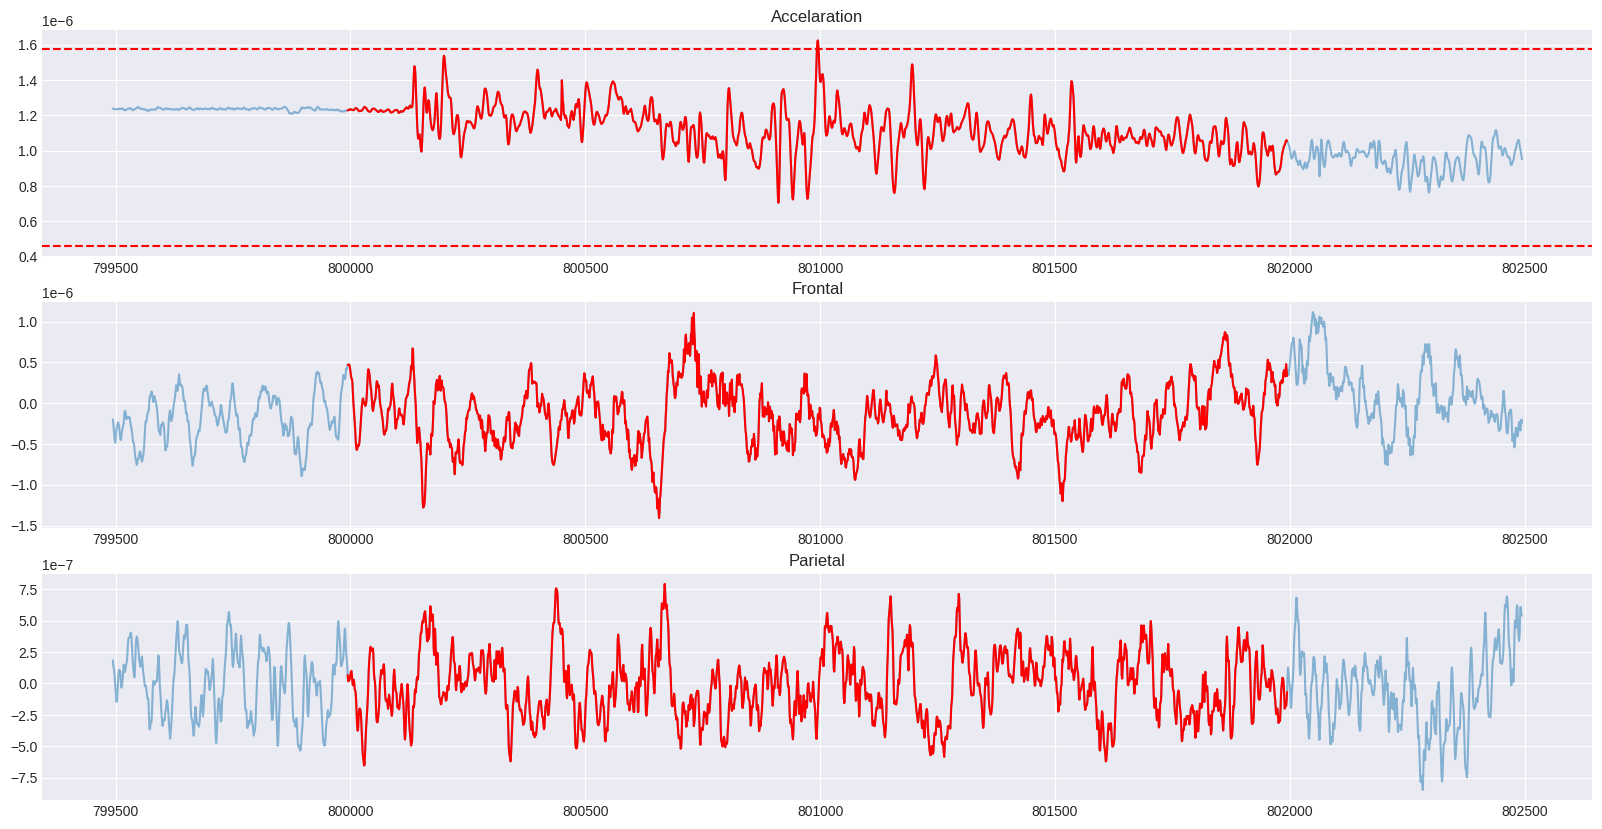

In [ ]:
# i is the index of the cropped out signal
i = 40
# mask is the range of the signal
zoom = 500 * 1
mask = list(range(test[i][0]-zoom, test[i][-1]+zoom))
# c is for colors
c = np.zeros(len(mask), dtype=bool)
c[zoom:-zoom] = True
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,10))
ax1.plot(mask,cc[mask],alpha=0.5)
ax1.plot(mask, np.where(c, cc[mask], np.nan), color='red')

ax1.axhline(mean+sd*std, color='red', linestyle='--')
ax1.axhline(mean-sd*std, color='red', linestyle='--')
ax1.set_title('Accelaration')

ax2.plot(mask,eeg_data[mask,0],alpha=0.5)
ax2.plot(mask, np.where(c, eeg_data[mask,0], np.nan), color='red')
ax2.set_title('Frontal')

ax3.plot(mask,eeg_data[mask,1],alpha=0.5)
ax3.plot(mask, np.where(c, eeg_data[mask,1], np.nan), color='red')
ax3.set_title('Parietal')

plt.show()

In [ ]:
mylist = []
for i in range(24):
    try:
        print(i, quality_control(i))
        mylist.append(quality_control(i))
    except:
        print(i, 'error, fix it')

0 (0.977626086251207, array([1.37614667e-06, 1.38624489e-06, 1.39147031e-06, ...,
       1.20792365e-06, 1.21307480e-06, 1.21365488e-06]), array([    603,     604,     605, ..., 1559430, 1559431, 1559432]), 1.1544236939131083e-06, 5.7312625484651865e-08)
1 (0.9367178480912799, array([1.36449647e-06, 1.21365488e-06, 1.21332407e-06, ...,
       1.15086627e-06, 1.15282619e-06, 1.15081275e-06]), array([   4905,    4906,    4907, ..., 1775018, 1775019, 1775020]), 1.15706172697053e-06, 3.832662956747415e-08)
2 (0.91164287595236, array([1.36449647e-06, 1.15081275e-06, 1.14938045e-06, ...,
       1.20656860e-06, 1.19770920e-06, 1.18853736e-06]), array([  43667,   43668,   43669, ..., 1773957, 1773958, 1773959]), 1.1567287650373837e-06, 3.6581685116795816e-08)
3 (0.9127967635591516, array([1.36449647e-06, 1.18853736e-06, 1.18027520e-06, ...,
       1.18441045e-06, 1.17952752e-06, 1.17709720e-06]), array([  31158,   31159,   31160, ..., 1766511, 1766512, 1766513]), 1.157655320364198e-06, 3.72063

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

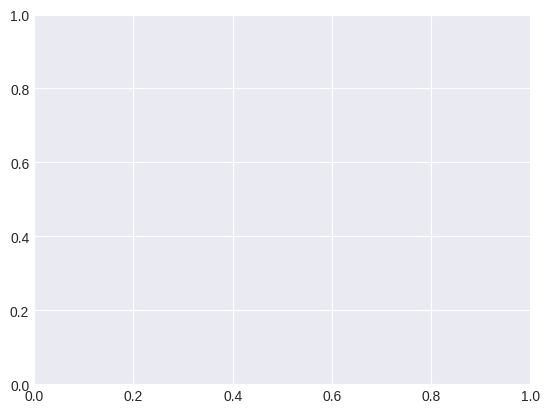

In [ ]:
plt.hist(mylist)

In [ ]:
quality_control(8)

ValueError: need at least one array to concatenate

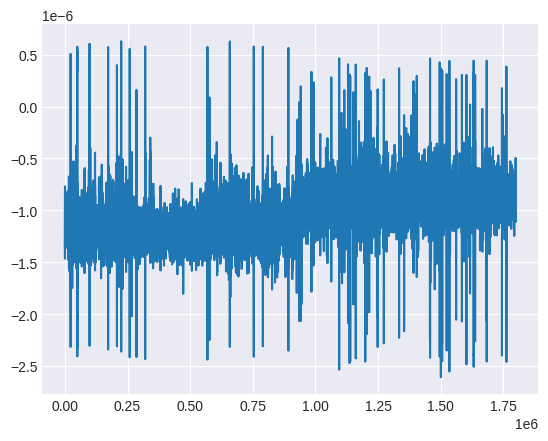

In [ ]:
i = 8
fname_screw = f'../Data/hours/sub-01-SR1_screew_fixed_{i}-{i+1}'
EEG_screw = read_raw_eeglab( fname_screw+'.set', preload = False, verbose = False)
SAMPLING_RATE=500
eeg_data = EEG_screw.get_data().T

# filter signal
acc = eeg_data[:,2].reshape(-1,1)
num_std = 10
padding_before_noise = 2*SAMPLING_RATE
padding_after_noise = 2*SAMPLING_RATE
# if it has multiple dimension choose the maximum along them at each sample 
quality_control = cc**2

# calculate the mean of quality_control:
mean = np.mean(quality_control)

# calculate the standard deviaton of quality_control
std = np.std(quality_control)

# if a point in signal is further away from the mean than 3 sd than add it to mask
mask = (quality_control > mean+num_std*std) | (quality_control < mean-num_std*std)

# get the inidices where mask is True
idx = np.where(mask)[0]
# remove indeces that are too close to the edge from idx to avoid edge effects
idx = idx[(idx > padding_before_noise) & (idx < quality_control.shape[0]-padding_after_noise)]
idx = np.concatenate([np.arange(i-padding_before_noise,i+padding_after_noise) for i in idx])


array([ 456735,  456736,  456737, ..., 1758657, 1758658, 1758659])